1. Different Gamma distributions with same rate parameter:


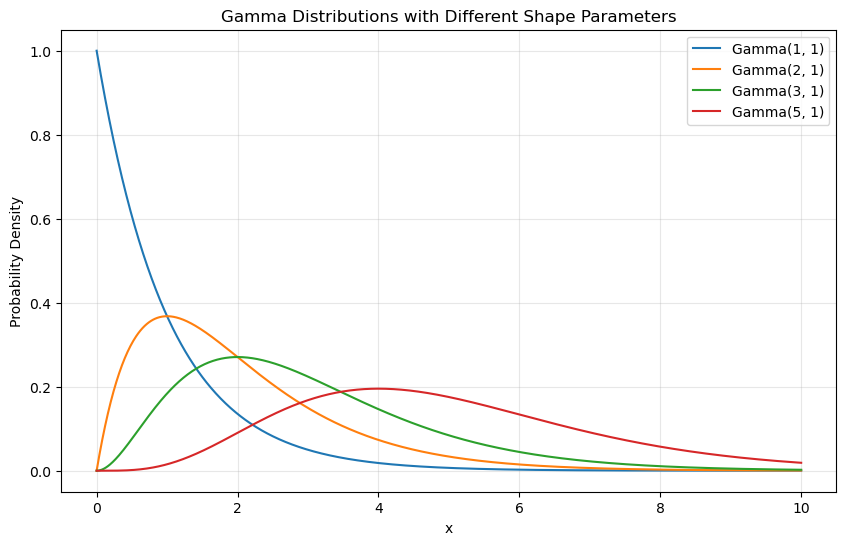

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def plot_gamma_pdfs(shapes, rate, x_range=(0, 10)):
    """Plot PDF of Gamma distributions with different shape parameters but same rate."""
    x = np.linspace(x_range[0], x_range[1], 1000)
    plt.figure(figsize=(10, 6))
    
    for shape in shapes:
        y = stats.gamma.pdf(x, a=shape, scale=1/rate)
        plt.plot(x, y, label=f'Gamma({shape}, {rate})')
    
    plt.title('Gamma Distributions with Different Shape Parameters')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def demonstrate_gamma_sum(shape1, shape2, rate, n_samples=10000):
    """Demonstrate sum of two Gamma distributions through simulation."""
    # Generate random samples
    x1 = np.random.gamma(shape1, scale=1/rate, size=n_samples)
    x2 = np.random.gamma(shape2, scale=1/rate, size=n_samples)
    sum_x = x1 + x2
    
    # Calculate theoretical PDF for the sum
    x_range = np.linspace(0, max(sum_x), 1000)
    theoretical_pdf = stats.gamma.pdf(x_range, a=shape1+shape2, scale=1/rate)
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot original distributions
    sns.kdeplot(data=x1, ax=ax1, label=f'Gamma({shape1}, {rate})')
    sns.kdeplot(data=x2, ax=ax1, label=f'Gamma({shape2}, {rate})')
    ax1.set_title('Original Gamma Distributions')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot sum distribution
    sns.histplot(data=sum_x, stat='density', bins=50, alpha=0.5, ax=ax2, 
                label='Simulated Sum')
    ax2.plot(x_range, theoretical_pdf, 'r-', label=f'Theoretical Gamma({shape1+shape2}, {rate})')
    ax2.set_title('Sum Distribution')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def show_exponential_special_case(rate=1, n_exp=3, n_samples=10000):
    """Demonstrate sum of n exponential distributions."""
    # Generate samples for n exponential distributions
    samples = [np.random.exponential(scale=1/rate, size=n_samples) for _ in range(n_exp)]
    sum_samples = np.sum(samples, axis=0)
    
    # Calculate theoretical PDF
    x_range = np.linspace(0, max(sum_samples), 1000)
    theoretical_pdf = stats.gamma.pdf(x_range, a=n_exp, scale=1/rate)
    
    plt.figure(figsize=(10, 6))
    
    # Plot histogram of simulated sums
    plt.hist(sum_samples, bins=50, density=True, alpha=0.5, 
             label='Simulated sum of exponentials')
    
    # Plot theoretical Gamma distribution
    plt.plot(x_range, theoretical_pdf, 'r-', 
            label=f'Theoretical Gamma({n_exp}, {rate})')
    
    plt.title(f'Sum of {n_exp} Exponential({rate}) Distributions')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Demonstrate different visualization scenarios
print("1. Different Gamma distributions with same rate parameter:")
plot_gamma_pdfs([1, 2, 3, 5], 1)



2. Demonstrating sum of two Gamma distributions:


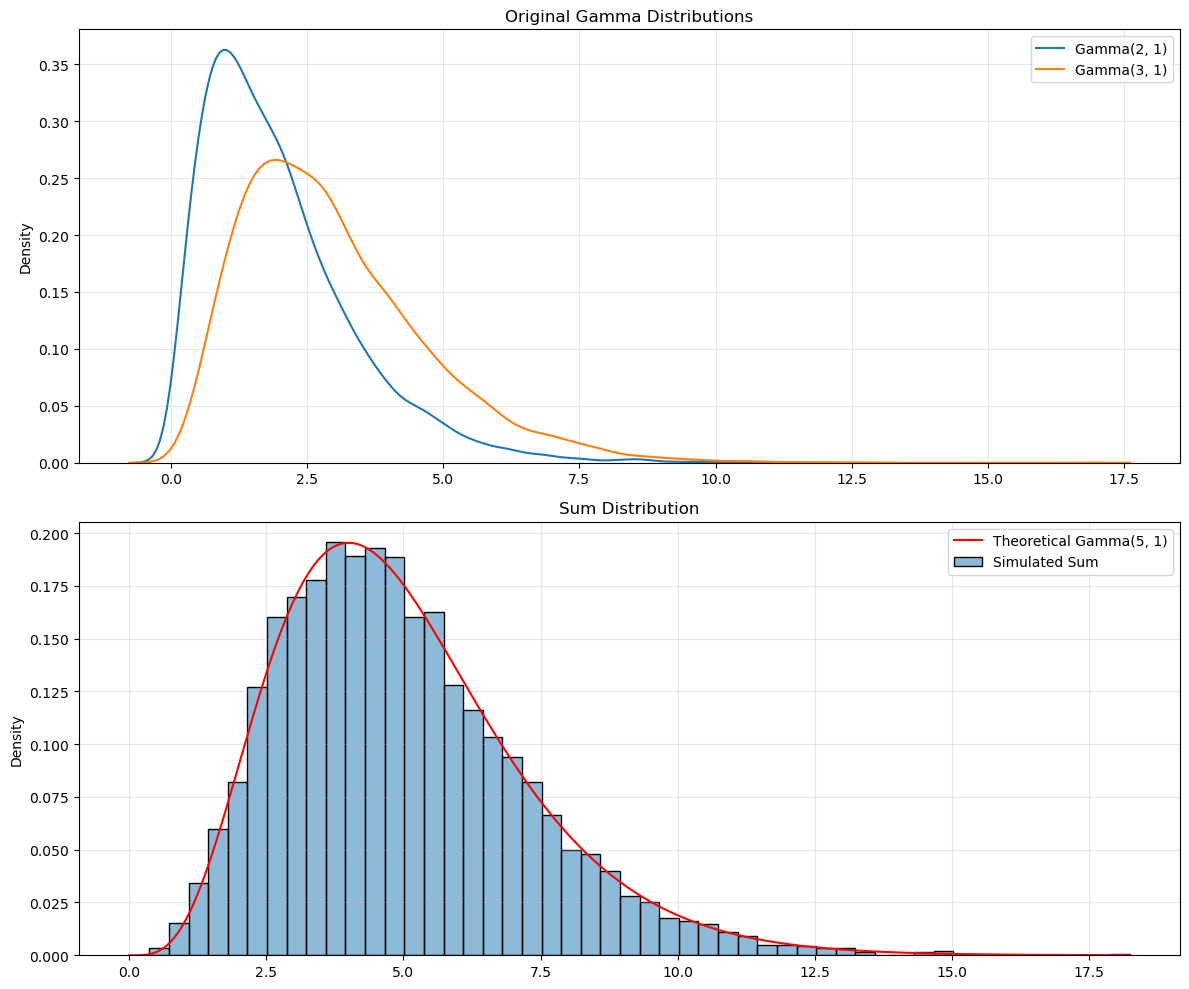

In [2]:

print("\n2. Demonstrating sum of two Gamma distributions:")
demonstrate_gamma_sum(2, 3, 1)



3. Special case: Sum of exponential distributions:


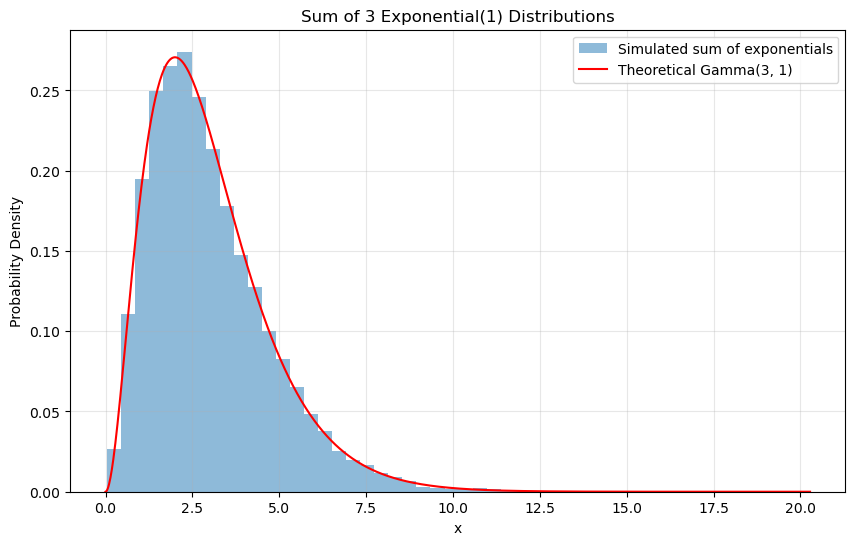

In [3]:

print("\n3. Special case: Sum of exponential distributions:")
show_exponential_special_case(rate=1, n_exp=3)

1. Understanding the Shape Parameter (α)
The shape parameter determines the fundamental form of the distribution:


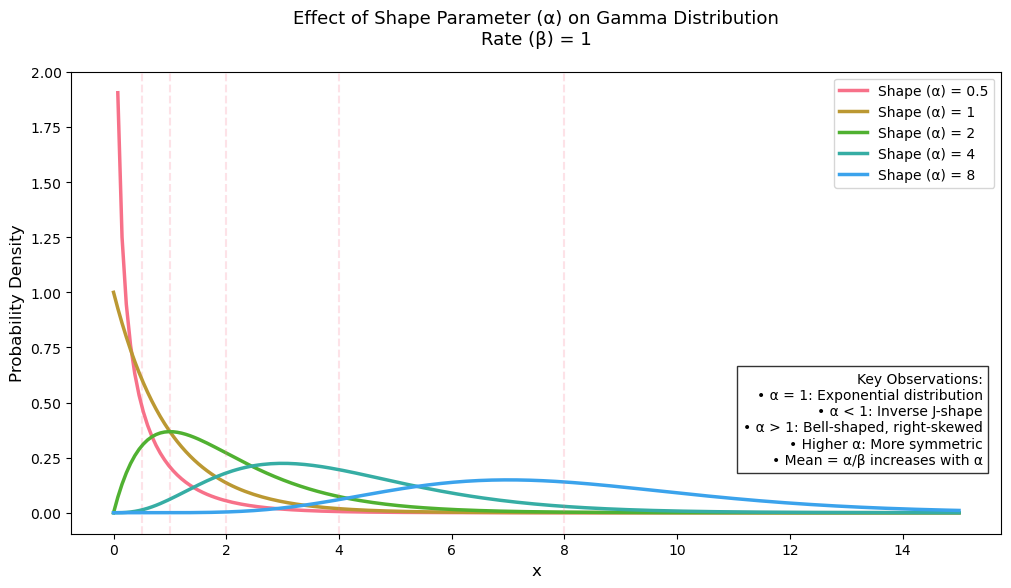


2. Understanding the Rate Parameter (β)
The rate parameter controls the scale of the distribution:


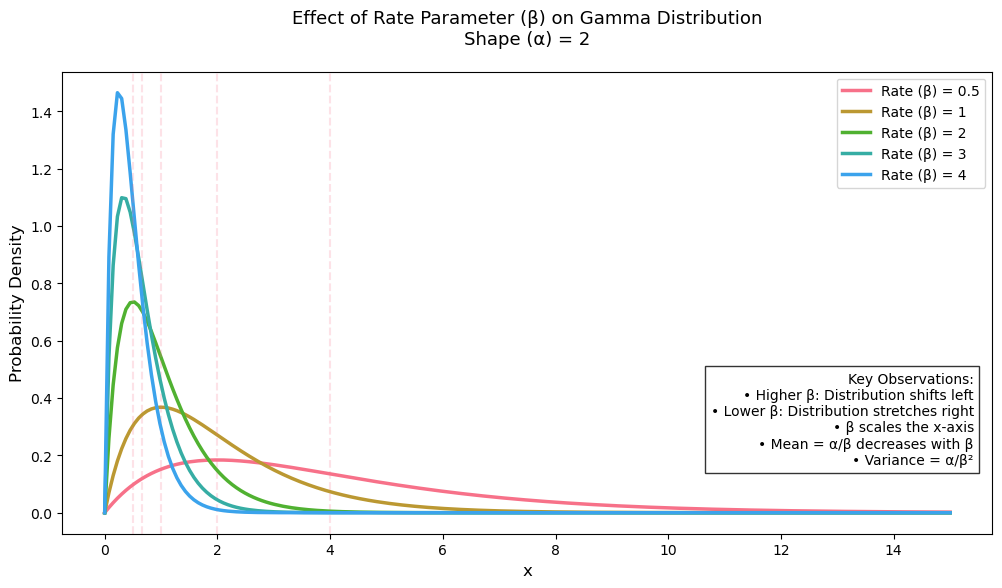


3. The Exponential Distribution Special Case
When shape (α) = 1, the Gamma distribution becomes the exponential distribution:


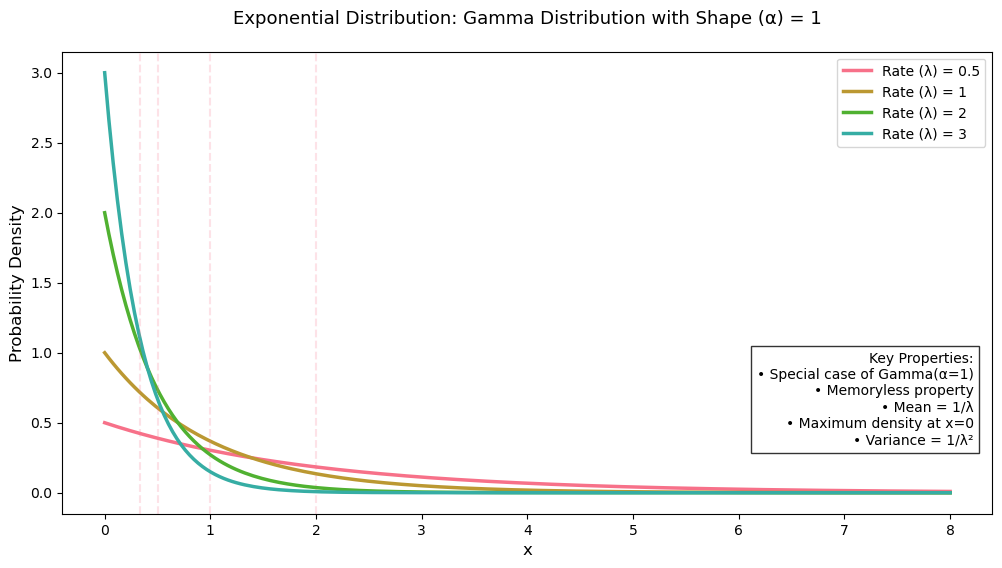

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set styling for better-looking plots

sns.set_palette("husl")

def plot_shape_parameter_effects():
    """
    Demonstrates how the shape parameter (α) affects the Gamma distribution.
    We keep the rate parameter constant to isolate the effect of shape.
    """
    # Create a range of x values for plotting
    x = np.linspace(0, 15, 200)
    
    # Create subplot with a larger figure size for better visibility
    plt.figure(figsize=(12, 6))
    
    # Plot different shape parameters while keeping rate=1
    shape_values = [0.5, 1, 2, 4, 8]
    rate = 1
    
    for shape in shape_values:
        y = stats.gamma.pdf(x, a=shape, scale=1/rate)
        plt.plot(x, y, linewidth=2.5, label=f'Shape (α) = {shape}')
        
        # Add vertical line for mean
        mean = shape/rate
        plt.axvline(x=mean, linestyle='--', alpha=0.2)
    
    plt.title('Effect of Shape Parameter (α) on Gamma Distribution\nRate (β) = 1', 
              fontsize=13, pad=20)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.legend(fontsize=10)
    
    # Add explanatory text box
    text = """Key Observations:
• α = 1: Exponential distribution
• α < 1: Inverse J-shape
• α > 1: Bell-shaped, right-skewed
• Higher α: More symmetric
• Mean = α/β increases with α"""
    
    plt.text(0.98, 0.35, text, transform=plt.gca().transAxes,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(facecolor='white', alpha=0.8))
    plt.show()

def plot_rate_parameter_effects():
    """
    Demonstrates how the rate parameter (β) affects the Gamma distribution.
    We keep the shape parameter constant to isolate the effect of rate.
    """
    x = np.linspace(0, 15, 200)
    plt.figure(figsize=(12, 6))
    
    # Plot different rate parameters while keeping shape=2
    rate_values = [0.5, 1, 2, 3, 4]
    shape = 2
    
    for rate in rate_values:
        y = stats.gamma.pdf(x, a=shape, scale=1/rate)
        plt.plot(x, y, linewidth=2.5, label=f'Rate (β) = {rate}')
        
        # Add vertical line for mean
        mean = shape/rate
        plt.axvline(x=mean, linestyle='--', alpha=0.2)
    
    plt.title('Effect of Rate Parameter (β) on Gamma Distribution\nShape (α) = 2', 
              fontsize=13, pad=20)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.legend(fontsize=10)
    
    # Add explanatory text box
    text = """Key Observations:
• Higher β: Distribution shifts left
• Lower β: Distribution stretches right
• β scales the x-axis
• Mean = α/β decreases with β
• Variance = α/β²"""
    
    plt.text(0.98, 0.35, text, transform=plt.gca().transAxes,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(facecolor='white', alpha=0.8))
    plt.show()

def plot_exponential_special_case():
    """
    Demonstrates the exponential distribution as a special case of the Gamma
    distribution where shape (α) = 1. Shows effect of different rates.
    """
    x = np.linspace(0, 8, 200)
    plt.figure(figsize=(12, 6))
    
    # Plot exponential distributions with different rates
    rate_values = [0.5, 1, 2, 3]
    shape = 1  # Exponential is Gamma with shape = 1
    
    for rate in rate_values:
        y = stats.gamma.pdf(x, a=shape, scale=1/rate)
        plt.plot(x, y, linewidth=2.5, label=f'Rate (λ) = {rate}')
        
        # Add vertical line for mean
        mean = 1/rate  # For exponential, mean = 1/λ
        plt.axvline(x=mean, linestyle='--', alpha=0.2)
    
    plt.title('Exponential Distribution: Gamma Distribution with Shape (α) = 1', 
              fontsize=13, pad=20)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.legend(fontsize=10)
    
    # Add explanatory text box
    text = """Key Properties:
• Special case of Gamma(α=1)
• Memoryless property
• Mean = 1/λ
• Maximum density at x=0
• Variance = 1/λ²"""
    
    plt.text(0.98, 0.35, text, transform=plt.gca().transAxes,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(facecolor='white', alpha=0.8))
    plt.show()

# Generate all visualizations with explanations
print("1. Understanding the Shape Parameter (α)")
print("The shape parameter determines the fundamental form of the distribution:")
plot_shape_parameter_effects()

print("\n2. Understanding the Rate Parameter (β)")
print("The rate parameter controls the scale of the distribution:")
plot_rate_parameter_effects()

print("\n3. The Exponential Distribution Special Case")
print("When shape (α) = 1, the Gamma distribution becomes the exponential distribution:")
plot_exponential_special_case()

Understanding the Relationship between Poisson, Exponential, and Gamma Distributions

This visualization demonstrates how these distributions model different aspects
of the same random process, using a service center example.


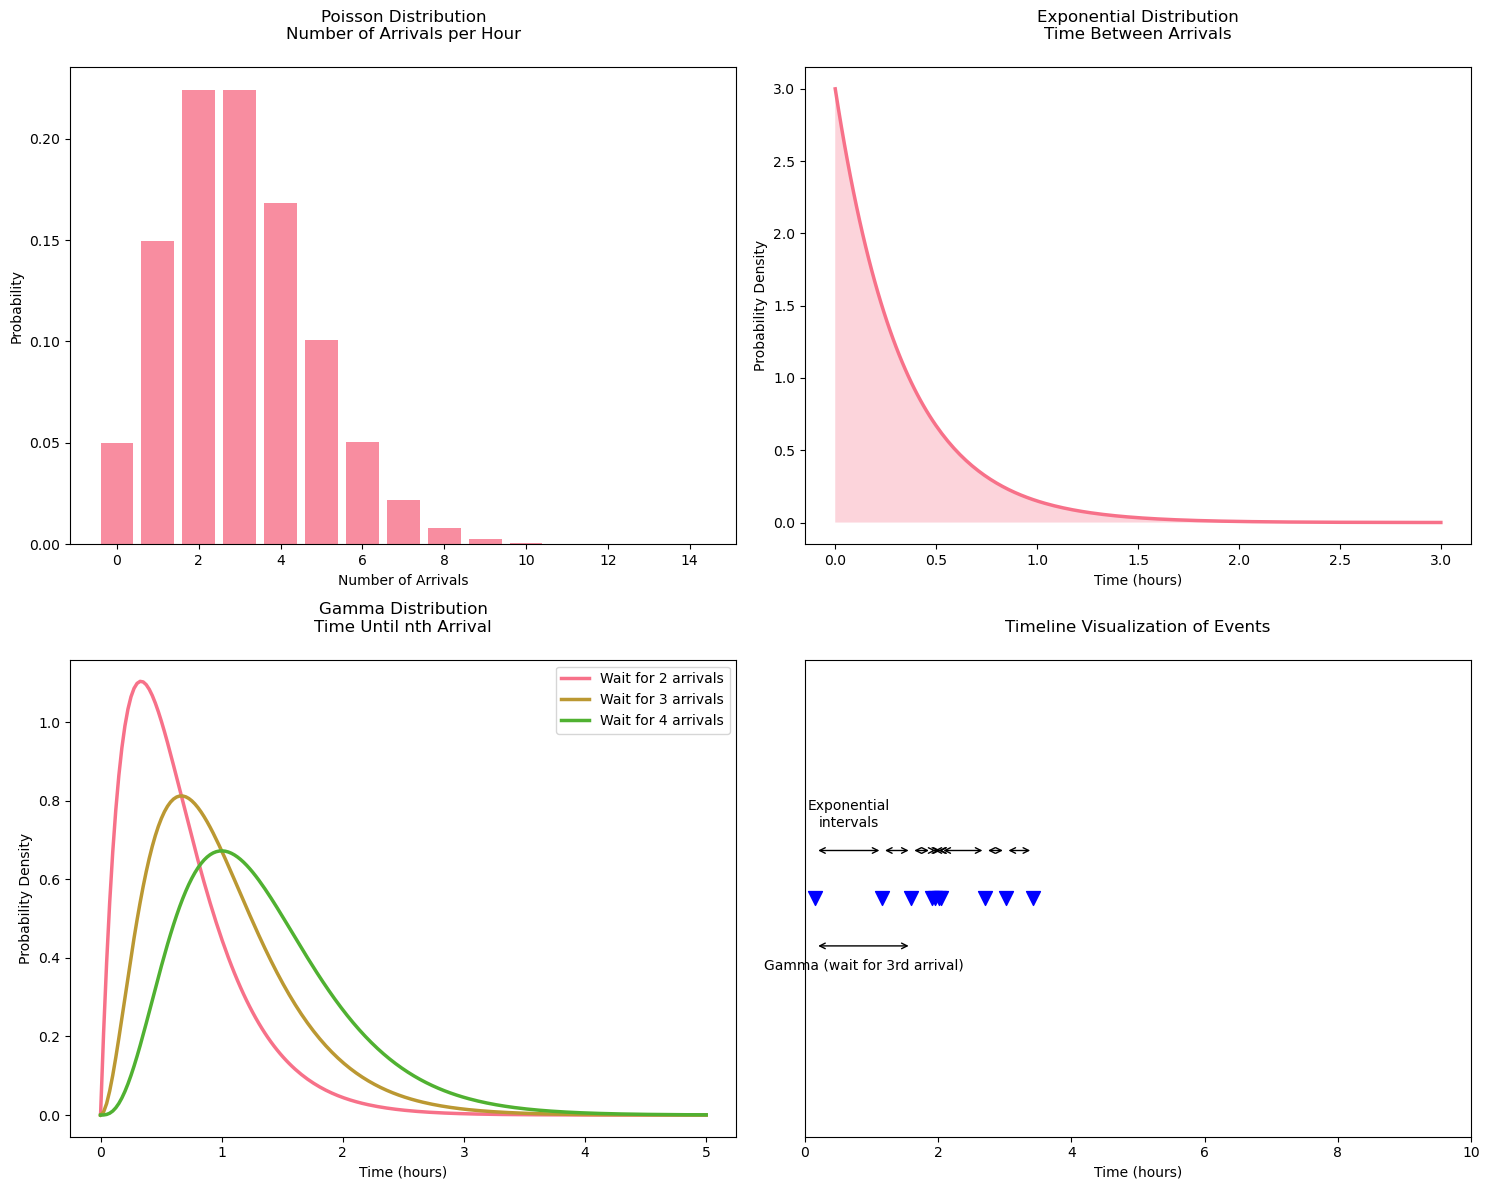

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Set style for better visualization

sns.set_palette("husl")

def plot_distributions_relationship():
    """
    Visualize the relationship between Poisson, Exponential, and Gamma distributions
    through a practical example of a service center.
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Poisson Process - Number of arrivals
    k = np.arange(0, 15)
    rate = 3  # Average 3 customers per hour
    poisson_pmf = stats.poisson.pmf(k, rate)
    
    ax1.bar(k, poisson_pmf, alpha=0.8, label=f'λ = {rate}')
    ax1.set_title('Poisson Distribution\nNumber of Arrivals per Hour', pad=20)
    ax1.set_xlabel('Number of Arrivals')
    ax1.set_ylabel('Probability')
    
    # 2. Exponential Distribution - Time between arrivals
    x = np.linspace(0, 3, 200)
    exp_pdf = stats.expon.pdf(x, scale=1/rate)
    
    ax2.plot(x, exp_pdf, linewidth=2.5, label=f'λ = {rate}')
    ax2.fill_between(x, exp_pdf, alpha=0.3)
    ax2.set_title('Exponential Distribution\nTime Between Arrivals', pad=20)
    ax2.set_xlabel('Time (hours)')
    ax2.set_ylabel('Probability Density')
    
    # 3. Gamma Distribution - Time until n-th arrival
    x_gamma = np.linspace(0, 5, 200)
    shapes = [2, 3, 4]  # Wait for 2nd, 3rd, 4th arrival
    
    for shape in shapes:
        gamma_pdf = stats.gamma.pdf(x_gamma, a=shape, scale=1/rate)
        ax3.plot(x_gamma, gamma_pdf, linewidth=2.5, 
                label=f'Wait for {shape} arrivals')
    
    ax3.set_title('Gamma Distribution\nTime Until nth Arrival', pad=20)
    ax3.set_xlabel('Time (hours)')
    ax3.set_ylabel('Probability Density')
    ax3.legend()
    
    # 4. Combined timeline visualization
    ax4.set_title('Timeline Visualization of Events', pad=20)
    ax4.set_xlim(0, 10)
    ax4.set_ylim(0, 2)
    
    # Generate random arrival times for visualization
    np.random.seed(42)
    arrivals = np.cumsum(np.random.exponential(1/rate, size=10))
    
    # Plot arrival events
    ax4.scatter(arrivals, np.ones_like(arrivals), color='blue', 
                marker='v', s=100, label='Arrivals')
    
    # Plot intervals
    for i in range(len(arrivals)-1):
        ax4.annotate('', xy=(arrivals[i+1], 1.2), xytext=(arrivals[i], 1.2),
                    arrowprops=dict(arrowstyle='<->'))
        if i == 0:
            ax4.text((arrivals[i+1]+arrivals[i])/2, 1.3, 
                     'Exponential\nintervals', ha='center')
    
    # Highlight gamma waiting time
    ax4.annotate('', xy=(arrivals[2], 0.8), xytext=(arrivals[0], 0.8),
                arrowprops=dict(arrowstyle='<->'))
    ax4.text((arrivals[2]+arrivals[0])/2, 0.7, 
             'Gamma (wait for 3rd arrival)', ha='center')
    
    ax4.set_xlabel('Time (hours)')
    ax4.set_yticks([])
    
    plt.tight_layout()
    plt.show()

# Generate visualization with explanation
print("Understanding the Relationship between Poisson, Exponential, and Gamma Distributions")
print("\nThis visualization demonstrates how these distributions model different aspects")
print("of the same random process, using a service center example.")
plot_distributions_relationship()